In [2]:
from sklearn.datasets import fetch_mldata
try:
    mnist = fetch_mldata('MNIST original')
except Exception as ex:        
    from six.moves import urllib
    from scipy.io import loadmat
    import os

    mnist_path = os.path.join(".", "datasets", "mnist-original.mat")

    # download dataset from github.
    mnist_alternative_url = "https://github.com/amplab/datascience-sp14/raw/master/lab7/mldata/mnist-original.mat"
    response = urllib.request.urlopen(mnist_alternative_url)
    with open(mnist_path, "wb") as f:
        content = response.read()
        f.write(content)

    mnist_raw = loadmat(mnist_path)
    mnist = {
        "data": mnist_raw["data"].T,
        "target": mnist_raw["label"][0],
        "COL_NAMES": ["label", "data"],
        "DESCR": "mldata.org dataset: mnist-original",
    }
    print("Done!")

Done!


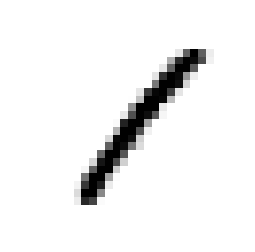

In [1]:
from sklearn.datasets import fetch_mldata
from scipy.io import loadmat

mnist_raw = loadmat('C:\\Users\\hzg0601\\datasets\\mnist-original.mat')
mnist = {
        "data": mnist_raw["data"].T,
        "target": mnist_raw["label"][0],
        "COL_NAMES": ["label", "data"],
        "DESCR": "mldata.org dataset: mnist-original",
    }

#fetch_mldata?
#mnist = fetch_mldata('MNIST original')
X,y=mnist['data'],mnist['target']
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
some_digit_image=X[6000].reshape(28,28)
plt.imshow(some_digit_image,cmap=matplotlib.cm.binary,interpolation='nearest')
plt.axis('off')
plt.show()

D:\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
D:\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


0.9606


D:\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


0.95785


D:\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


0.96535


D:\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
D:\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
D:\anaconda3\lib\site-packages\sklearn\linear_model\stoc

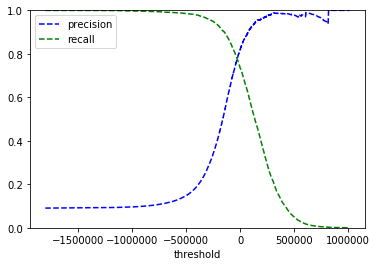

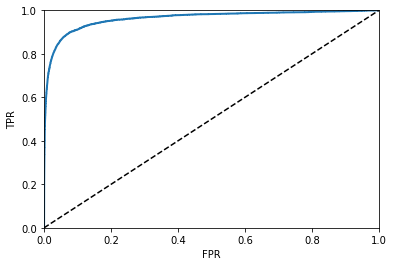

0.9627243716614006


In [2]:
X_train,X_test,y_train,y_test=X[:60000],X[60000:],y[:60000],y[60000:]
#shuffle，保证不会cv集有较高的相似度，一些算法会对输入顺序敏感，
import numpy as np
shuffle_index=np.random.permutation(60000)
X_train,y_train=X_train[shuffle_index],y_train[shuffle_index]

y_train_5=(y_train==5)
y_test_5=(y_test==5)

from sklearn.linear_model import SGDClassifier
#独立处理所有样本，适于在线学习。
sgd_clf=SGDClassifier(random_state=42)
sgd_clf.fit(X_train,y_train_5)
#sgd_clf.predict([some_digit_image])

#performance measures
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone
skfolds=StratifiedKFold(n_splits=3,random_state=42)
for train_index,test_index in skfolds.split(X_train,y_train_5):
    clone_clf=clone(sgd_clf)#否则会保存上次训练的结果
    X_train_folds=X_train[train_index]
    y_train_folds=(y_train_5[train_index])
    X_test_fold=X_train[test_index]
    y_test_fold=(y_train_5[test_index])
    
    clone_clf.fit(X_train_folds,y_train_folds)
    y_pred=clone_clf.predict(X_test_fold)
    n_correct=sum(y_pred==y_test_fold)
    print(n_correct/len(y_pred))
    
from sklearn.model_selection import cross_val_score as cvs#***
cvs(sgd_clf,X_train,y_train_5,cv=3,scoring='accuracy')

from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self,X,y=None):
        pass
    def predict(self,X):
        return np.zeros((len(X),1),dtype=bool)
never_5_clf=Never5Classifier()
cvs(never_5_clf,X_train,y_train,cv=3,scoring='accuracy')

#混淆矩阵
from sklearn.model_selection import cross_val_predict as cvp
y_train_pred=cvp(sgd_clf,X_train,y_train_5,cv=3)
#返回值为其他训练样本训练处的分离器预测的本折样本的预测

from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5,y_train_pred)

#confusion_matrix(y_train_5,y_train_perfect_predictions)

#precision精确率 TP/(TP+FP)
#recall召回率/sensitivity/TPR(true positive rate) TP/(TP+FN)

from sklearn.metrics import precision_score,recall_score
precision_score(y_train_5,y_train_pred)
recall_score(y_train_5,y_train_pred)

from sklearn.metrics import f1_score
f1_score(y_train_5,y_train_pred)

#F_1=2/{precision^{-1}+recall^{-1}}#调和均值,因此precision和recall相似的回归器易得的更改的
#F1_score
#在分类问题中，分类器事实上是自设一个threshold，以进行分类。sklearn不支持直接设置threshold
#但可以间接设置。
some_digit=X[6000]
y_scores=sgd_clf.decision_function([some_digit])
#类似于predict函数，返回每个样本的得分预测（什么得分）,最小梯度值？
y_scores
threshold=20
y_some_digit_pred=(y_scores>threshold)

#为确定threshold值，需选择cvp函数，指定返回decision scores
y_scores=cvp(sgd_clf,X_train,y_train_5,cv=3,method='decision_function')
#precision_recall_curve以计算所有precision和recall
from sklearn.metrics import precision_recall_curve as prc
precisions,recalls,thresholds=prc(y_train_5,y_scores)

def plot_precision_recall_vs_threshold(precisions,recalls,thresholds):
    plt.plot(thresholds,precisions[:-1],'b--',label='precision')
    plt.plot(thresholds,recalls[:-1],'g--',label='recall')
    plt.xlabel('threshold')
    plt.legend()
    plt.ylim([0,1])
    plt.show()
plot_precision_recall_vs_threshold(precisions,recalls,thresholds)
#recall随threshold的上升而下降，而precision并不总是随threshold的下降而下降。

y_train_pred_90=(y_scores>70000)
precision_score(y_train_5,y_train_pred_90)
recall_score(y_train_5,y_train_pred_90)

#receiver operating characteristic ROC curve是用来衡量二分类器性能的常用指标，以TPrate-FPrate
#作为纵横坐标。FPR是负例被误分为正例的比例，等于1-TNR（负例被正确分类为负例的比例），TNR又被称为
#specificity,ROC曲线即sensitivity(recall)-(1-specificity)
from sklearn.metrics import roc_curve
fpr,tpr,threshold=roc_curve(y_train_5,y_scores)
def plot_roc_curve(fpr,tpr,label=None):
    plt.plot(fpr,tpr,linewidth=2,label=label)
    plt.plot([0,1],[0,1],'k--')
    plt.axis([0,1,0,1])
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.show()
plot_roc_curve(fpr,tpr)
#AUC,area under curve
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_train_5,y_scores))

#当正例较少时或更关注伪正例而非伪负例时，选择PR曲线，反之选择ROC曲线。

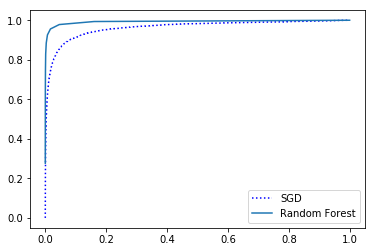

0.9931434681352331

In [3]:
#randomforestclassifer类没有decision_function，但有predict_proba()
from sklearn.ensemble import RandomForestClassifier as RFC
forest_clf=RFC(random_state=42)

y_probas_forest=cvp(forest_clf,X_train,y_train_5,cv=3,method='predict_proba')
y_scores_forest=y_probas_forest[:,1]#scores=proba of positive class
fpr_forest,tpr_forest,threshold_forest=roc_curve(y_train_5,y_scores_forest)
plt.plot(fpr,tpr,'b:',label='SGD')
plt.plot(fpr_forest,tpr_forest,label='Random Forest')
plt.legend(loc='lower right')
plt.show()
roc_auc_score(y_train_5,y_scores_forest)

In [4]:
#多分类
#RF和朴素贝叶斯支持多分了，SVM只支持二分类
#多分类，训练多个二分类器，根据得分取出最大得分的结果作为分类结果，one-versus-all
#第二种是对每一组成对数字训练一个二分类器，如0-1，1-2，one-versus-one，
    #即训练N*(N-1)/2个分类器，OvO的主要优势在于：每个分类器只需对需要识别的两个数字类
    #对应的训练数据进行训练。SVM算法的复杂度随着数据的增加而增加，因此更适合OVO.

    #sklearn的OvA or OvR算法-SGD
sgd_clf.fit(X_train,y_train)
sgd_clf.predict([some_digit])
some_digit_scores=sgd_clf.decision_function([some_digit])
some_digit_scores.argmax()

#sklearn的OvA or OvR算法-OneVsOneClassifier
from sklearn.multiclass import OneVsOneClassifier
ovo_clf=OneVsOneClassifier(SGDClassifier(random_state=42))
ovo_clf.fit(X_train,y_train)
ovo_clf.predict([some_digit])
len(ovo_clf.estimators_)
ovo_clf.score
ovo_clf.classes_
ovo_clf.decision_function#仍然有decision_function

#RF多分类器，
forest_clf.fit(X_train,y_train)
forest_clf.predict([some_digit])
len(forest_clf.predict_proba([some_digit]).flatten())
cvs(sgd_clf,X_train,y_train,cv=3,scoring='accuracy')

#归一化（正则化、标准化）
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train.astype(np.float64))
cvs(sgd_clf,X_train_scaled,y_train,cv=3,scoring='accuracy')

#误差分析
y_train_pred=cvp(sgd_clf,X_train_scaled,y_train,cv=3)
conf_mx=confusion_matrix(y_train,y_train_pred)
conf_mx
plt.matshow(conf_mx,cmap=plt.cm.gray)#在主对角上表明分类越正确，颜色越深效果越好
plt.show()

#误差率分析
row_sums=conf_mx.sum(axis=1,keepdims=True)
norm_conf_mx=conf_mx/row_sums
np.fill_diagonal(norm_conf_mx,0)
plt.matshow(norm_conf_mx,cmap=plt.cm.gray)
plt.show()
#行代表真实类，列代表预测类。

#个体误差
cl_a,cl_b=3,5
X_aa=X_train[(y_train==cl_a)&(y_train_pred==cl_a)]
X_bb=X_train[(y_train==cl_b)&(y_train_pred==cl_b)]
X_ab=X_train[(y_train==cl_a)&(y_train_pred==cl_b)]
X_ba=X_train[(y_train==cl_b)&(y_train_pred==cl_a)]

plt.figure(figsize=(8,8))
plt.subplot(221)
plot_digits(X_aa[:25],images_per_row=5)
plt.subplot(222)
plot_digits(X_ab[:25],images_per_row=5)
plt.subplot(223)
plot_digits(X_ba[:25],images_per_row=5)
plt.subplot(224)
plot_digits(X_bb[:25],images_per_row=5)
plt.show()

D:\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
D:\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
D:\anaconda3\lib\site-packages\sklearn\linear_model\stoc

D:\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
D:\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
D:\anaconda3\lib\site-packages\sklearn\linear_model\stoc

D:\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
D:\anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
D:\anaconda3\lib\site-packages\sklearn\linear_model\stoc

NameError: name 'StandardScler' is not defined

In [ ]:
#多标签分类
from sklearn.neighbors import KNeighborsClassifier
y_train_large=(y_train>=7)
y_train_odd=(y_train%2==1)
y_multilabel=np.c_[y_train_large,y_train_odd]
knn_clf=KNeighborsClassifier()
knn_clf.fit(X_train,y_multilabel)
knn_clf.predict([some_digit])
y_train_knn_pred=cvp(knn_clf,X_train,y_train,cv=3)
f1_score(y_train,y_train_knn_pred,average='macro')
#average,多标签情形下的f1计算方式，数据更多应给与更大的权重。
#either macro,weighted,sample,当不等权时，以样本数占比计算权重。
#sample计算每个样本的F1,然后计算平均值。
#Calculate metrics for each label, and find their unweighted
        #mean.  This does not take label imbalance into account.

    

#多输出分类，是多标签分类的一般情形，即每个标签有多个class,即多于一个可能值。
#图片降噪即典型的multioutput classification
#multioutput可以同时class标签和value标签

import numpy.random as rnd
noise_train=rnd.randint(0,100,(len(X_train),784))
noise_test=rnd.randint(0,100,(len(X_test),784))
X_train_mod=X_train+noise_train
X_test_mod=X_test+noise_test
y_train_mod=X_train
y_test_mod=X_test


some_digit_image=X_train_mod[6000].reshape(28,28)
plt.imshow(some_digit_image,cmap=matplotlib.cm.binary,interpolation='nearest')
plt.axis('off')
plt.show()

knn_clf.fit(X_train_mod,y_train_mod)
clean_digit=knn_clf.predict([[X_test_mod[100]]])

plt.imshow(clean_digit.reshape(28,28),cmap=matplotlib.cm.binary,interpolation='nearest')
plt.axis('off')
plt.show()

In [38]:
from sklearn.model_selection import StratifiedKFold
#StratifiedKFold?
from sklearn.model_selection import GridSearchCV
#GridSearchCV?
#sgd_clf.decision_function?
y_some_digit_pred
from sklearn.metrics import roc_curve
#roc_curve?
dir(ovo_clf)
ovo_clf.decision_function([some_digit])
dir(forest_clf)
a=forest_clf.predict_proba([some_digit])
dir(a)
len(a.flatten())
f1_score?